In [6]:
# import additional libraries

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('lesson_4.05_data.csv')

In [4]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [5]:
numericals

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
0,479,307,12883,27,14,31,4.000000,37.000000,4,7.741935
1,5468,1088,36175,12,13,3,18.000000,52.000000,2,15.666667
2,497,251,11576,26,14,27,12.000000,37.570799,4,7.481481
3,1000,386,15130,27,14,16,9.000000,28.000000,4,6.812500
4,576,240,9836,43,25,37,14.000000,20.000000,2,6.864865
...,...,...,...,...,...,...,...,...,...,...
88388,733,285,11390,23,12,24,3.000000,48.000000,4,3.375000
88389,988,433,18807,6,12,1,8.117886,37.570799,1,25.000000
88390,1679,806,26538,4,8,1,8.117886,50.000000,1,20.000000
88391,376,263,12178,14,17,7,3.000000,38.000000,3,8.285714


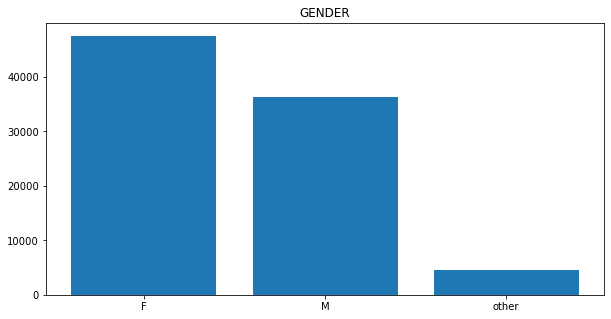

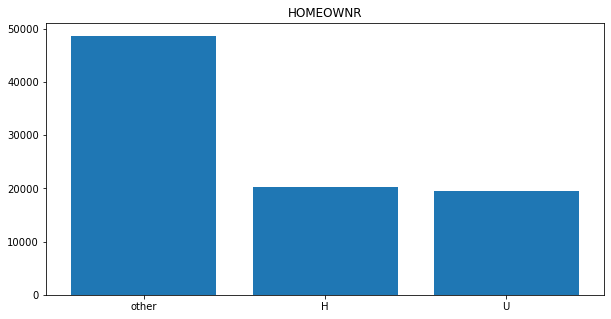

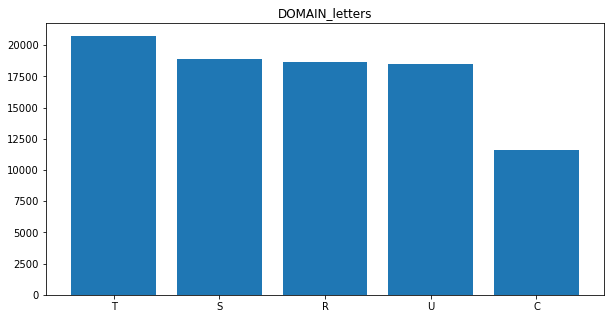

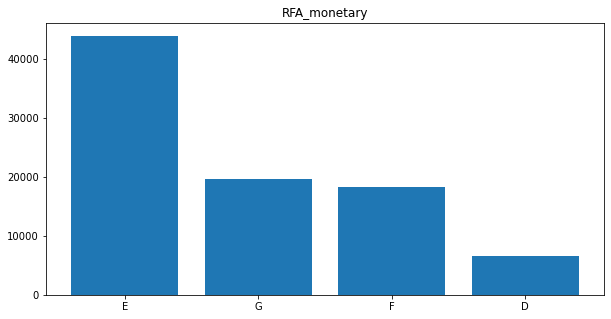

In [10]:
for c in categoricals:
    plt.figure(figsize=(10,5))
    plt.bar(categoricals[c].unique(), categoricals[c].value_counts())
    plt.title(c)
    plt.show();

array([[<AxesSubplot:title={'center':'HV1'}>,
        <AxesSubplot:title={'center':'IC1'}>,
        <AxesSubplot:title={'center':'IC5'}>],
       [<AxesSubplot:title={'center':'CARDPROM'}>,
        <AxesSubplot:title={'center':'NUMPRM12'}>,
        <AxesSubplot:title={'center':'NGIFTALL'}>],
       [<AxesSubplot:title={'center':'TIMELAG'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'RFA_frequency'}>],
       [<AxesSubplot:title={'center':'AVGGIFT'}>,
        <AxesSubplot:title={'center':'HV1_log'}>,
        <AxesSubplot:title={'center':'IC5_log'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

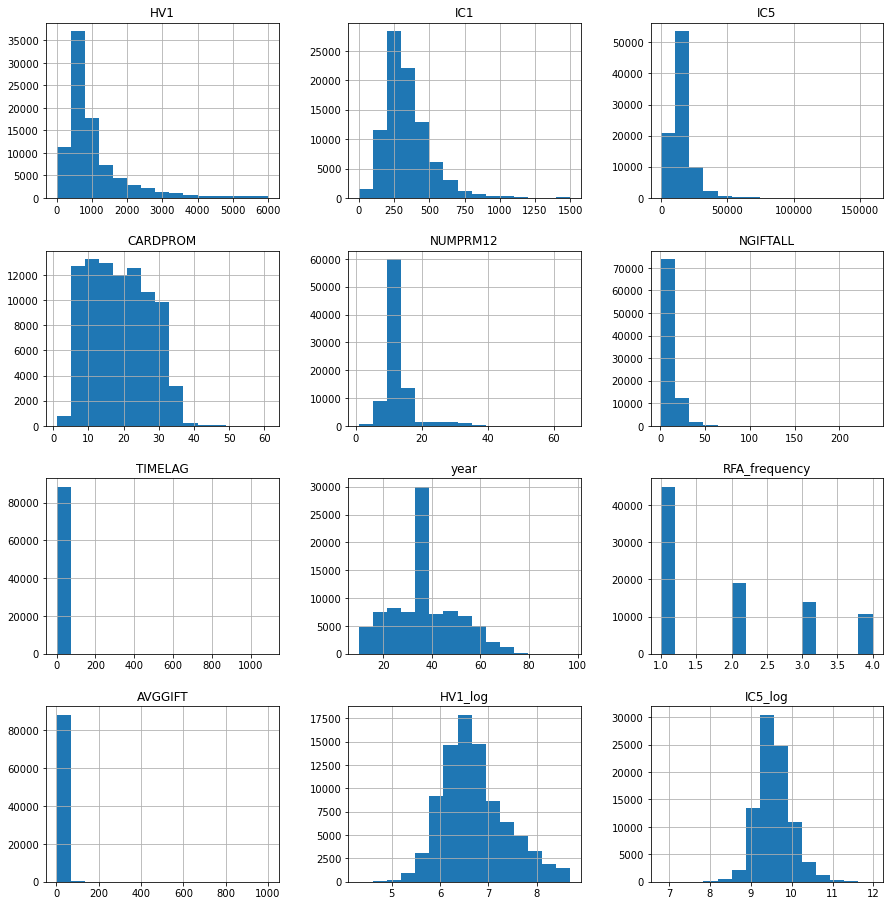

In [38]:
numericals.hist(bins=15, figsize=(15, 20), layout=(5, 3))

In [23]:

from sklearn.preprocessing import MinMaxScaler

ValueError: `bins` must increase monotonically, when an array

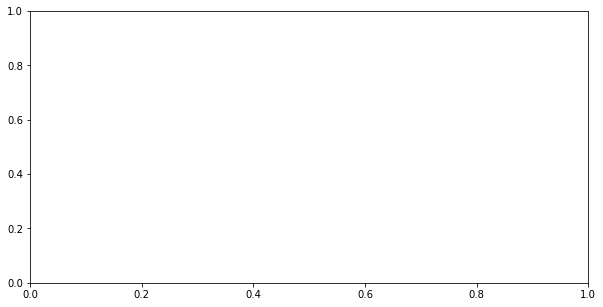

In [12]:
for c in numericals:
    plt.figure(figsize=(10,5))
    plt.hist(numericals[c].unique(), numericals[c].value_counts())
    plt.title(c)
    plt.show();

In [37]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN #  we can replace NANs with mean values in the next step   
numericals['IC5_log'] = list(map(log_transfom_clean_, numericals['IC5']))

In [35]:
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT,HV1_log
0,479,307,12883,27,14,31,4.0,37.000000,4,7.741935,6.171701
1,5468,1088,36175,12,13,3,18.0,52.000000,2,15.666667,8.606668
2,497,251,11576,26,14,27,12.0,37.570799,4,7.481481,6.208590
3,1000,386,15130,27,14,16,9.0,28.000000,4,6.812500,6.907755
4,576,240,9836,43,25,37,14.0,20.000000,2,6.864865,6.356108
